In [1]:
import os
import sys
import csv
import copy
import random
import itertools
from operator import itemgetter
from collections import defaultdict

# Make sure you've got Numpy and Scipy installed:
import numpy as np
import scipy
import scipy.spatial.distance
from numpy.linalg import svd

# For visualization:
from tsne import tsne # See http://lvdmaaten.github.io/tsne/#implementations
import matplotlib.pyplot as plt

#%matplotlib inline
import gensim.utils
from gensim.models import Doc2Vec, Word2Vec

import logging
import cPickle
import codecs


# LOG_FILE = "tsne_r127.log"
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

logging.info("[*] Loading model")
model = Doc2Vec.load("/home/laampt/orm/10K/5K/model/vinews_tok_doc585K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r131")

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [8]:
def tsne_viz(
        mat=None,
        rownames=None,
        indices=None,
        colors=None,
        output_filename=None,
        figheight=40,
        figwidth=50,
        display_progress=False): 
    """2d plot of mat using tsne, with the points labeled by rownames, 
    aligned with colors (defaults to all black).
    If indices is a list of indices into mat and rownames, 
    then it determines a subspace of mat and rownames to display.
    Give output_filename a string argument to save the image to disk.
    figheight and figwidth set the figure dimensions.
    display_progress=True shows the information that the tsne method prints out."""
    if not colors:
        colors = ['black' for i in range(len(rownames))]
    temp = sys.stdout
    if not display_progress:
        # Redirect stdout so that tsne doesn't fill the screen with its iteration info:
        f = open(os.devnull, 'w')
        sys.stdout = f
    tsnemat = tsne(mat)
    sys.stdout = temp
    # Plot coordinates:
    if not indices:
        indices = range(len(rownames))        
    vocab = np.array(rownames)[indices]
    xvals = tsnemat[indices, 0] 
    yvals = tsnemat[indices, 1]
    # Plotting:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_figheight(40)
    fig.set_figwidth(50)
    ax.plot(xvals, yvals, marker='', linestyle='')
    # Text labels:
    for word, x, y, color in zip(vocab, xvals, yvals, colors):
        ax.annotate(word, (x, y), fontsize=8, color=color)
    # Output:
    if output_filename:
        plt.savefig(output_filename, bbox_inches='tight')
    else:
        plt.show()
        

In [2]:
print model

Doc2Vec(dm/s,d200,n5,w8,mc2,s1e-05,t4)


In [3]:
N_NUM = 3000
pos_posts = []
for i in range(N_NUM):
    v = model.docvecs["r131_PD_{}".format(i)]
    size = v.shape
    if size[0] == 200: 
        pos_posts.append(v)
    else:
        pass

neg_posts = []
for i in range(N_NUM):
    if i % 3 == 0:
        v = model.docvecs["r131_TN_{}".format(i)]
    elif i % 3 == 1:
        v = model.docvecs["r131_VN_{}".format(i)]
    else:
        v = model.docvecs["r131_ZN_{}".format(i)]
    size = v.shape
    if size[0] == 200: 
        neg_posts.append(v)
    else:
        pass

print len(pos_posts), len(neg_posts)

3000 3000


In [5]:
N_TRAIN = 1000
X = np.vstack((np.array(pos_posts[:N_TRAIN]), np.array(neg_posts[:N_TRAIN])))
y = np.hstack((np.ones(N_TRAIN), np.zeros(N_TRAIN)))
target = ['b' if i else 'w' for i in y]
print X.shape, y.shape, len(target)

(2000, 200) (2000,) 2000


In [6]:
%matplotlib inline

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  2000 ...
Computing P-values for point  500  of  2000 ...
Computing P-values for point  1000  of  2000 ...
Computing P-values for point  1500  of  2000 ...
Mean value of sigma:  0.0382882271104
Iteration  10 : error is  24.1770924604
Iteration  20 : error is  22.3451770398
Iteration  30 : error is  20.8245609845
Iteration  40 : error is  20.6194868233
Iteration  50 : error is  20.7102403584
Iteration  60 : error is  20.7717809856
Iteration  70 : error is  20.7873124095
Iteration  80 : error is  20.7688355741
Iteration  90 : error is  20.7628455714
Iteration  100 : error is  20.7630676037
Iteration  110 : error is  3.41263469231
Iteration  120 : error is  2.99709994561
Iteration  130 : error is  2.77574651279
Iteration  140 : error is  2.63202055435
Iteration  150 : error is  2.52733604728
Iteration  160 : error is  2.44868568908
Iteration  170 : error is  2.38737894184
Iteration  180

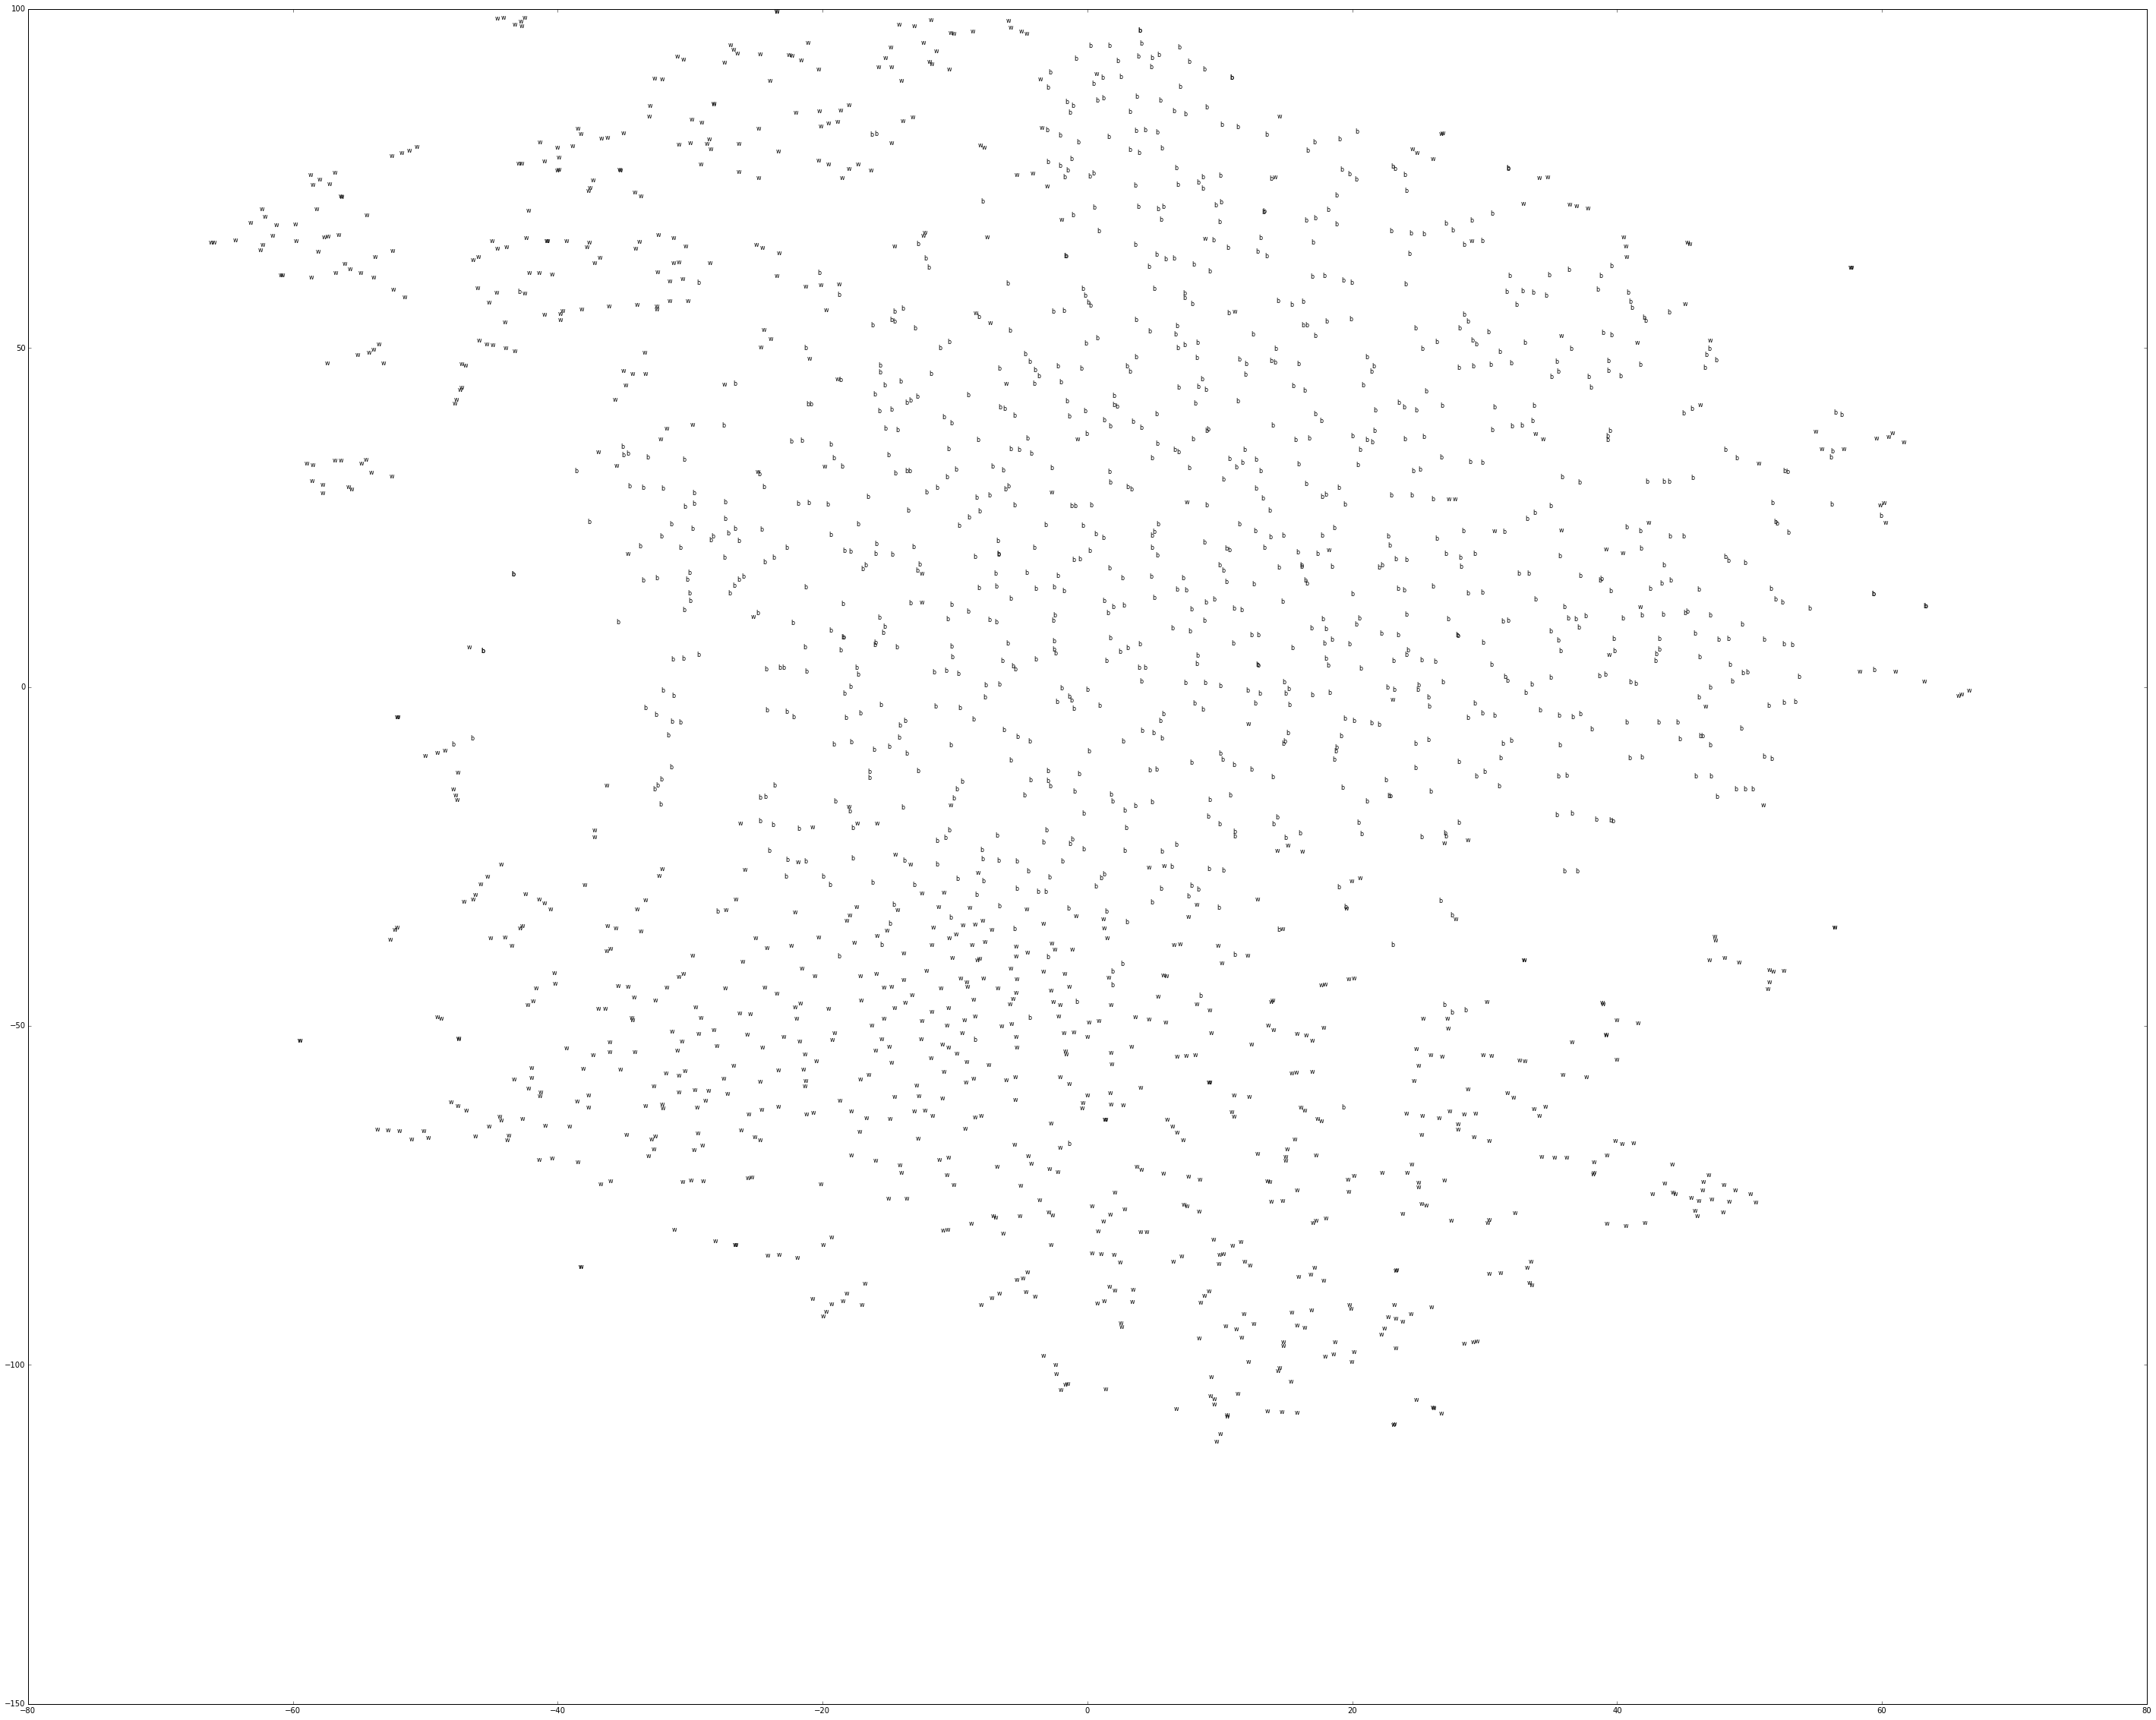

In [9]:
mat = np.asfarray(X)
tsne_viz(mat=mat, rownames=target, display_progress=True)